# Chord Analysis


In [19]:
import music21
import os
import sys
sys.path.append('../scripts')

import utils

from constants import GUITAR_INSTRUMENT_PATCH_NUMBERS, TUNING_LABELS

## Create dictionaries for analysis files and music21 scores 

In [2]:
"""
Create a id:score map and id:analysis map
So we can easily look at both together with the same id
"""
analysis_map = {}
score_map = {}

total_files = 0
for root, dirs, files in os.walk("../dataset-converted-xml/"):
    for file in files:
        if file.endswith(".musicxml"):
            # Construct the full path to the file
            full_path = os.path.join(root, file)            
            identifier = utils.get_id_from_path(full_path)
            score = music21.converter.parse(full_path)
            score_map[identifier] = score
            analysis_map[identifier] = utils.lookup_analysis_for_file(full_path)
            total_files+=1
print("total files retrieved", total_files)

No analysis found for Open D/Metal/Slaughter - Old Man.
No analysis found for Open D/Pop/Susanne Sundfør - Gravity.
No analysis found for Open D/Pop/Tamino - Verses.
No analysis found for Drop D/Folk/Hannes Wader - Heute Hier Morgen Dort.
No analysis found for Drop D/Folk/Alexi Murdoch - All My Days.
No analysis found for Drop D/Folk/Richard Thompson - Beeswing.
No analysis found for Drop D/Folk/Misc Traditional - Spatter The Dew.
No analysis found for Drop D/Metal/Opeth - Porcelain Heart (ver 2 by xFilth).
No analysis found for Drop D/Blues/Hugh Laurie - The Firing Song.


/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/musicxml/xmlToM21.py:2206: MusicXMLWarning: Warning: measure 17 in part Rythmis overfull: 493/120 > 4.0,assuming 4.0 is correct.
  warnings.warn(
/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/musicxml/xmlToM21.py:2206: MusicXMLWarning: Warning: measure 7 in part Leadis overfull: 2141/480 > 4.0,assuming 4.0 is correct.
  warnings.warn(
/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/musicxml/xmlToM21.py:2206: MusicXMLWarning: Warning: measure 13 in part Leadis overfull: 331/80 > 4.0,assuming 4.0 is correct.
  warnings.warn(
/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/musicxml/xmlToM21.py:2206: MusicXMLWarning: Warning: measure 15 in part Leadis overfull: 2141/480 > 4.0,assuming 4.0 is correct.
  warnings.warn(
/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.v

No analysis found for Drop D/Blues/Joseph Spence - Glory Glory.
No analysis found for Drop D/Blues/Eric Bibb - Needed Time.
No analysis found for Drop D/Blues/Rory Block - Big Road Blues.
No analysis found for Drop D/Blues/B.B. King - Get Out Of My Back Woman.
No analysis found for Drop D/Pop/Bruno Mars - Just The Way You Are (ver 3 by Mr. Heater).
No analysis found for Drop D/Pop/Jason Mraz - I Wont Give Up.
No analysis found for Drop D/Jazz/Sarah Vaughan - My Favorite Things.
No analysis found for Drop D/Jazz/Duke Ellington - Drop Me Off In Harlem.
No analysis found for Drop D/Jazz/Pat Metheny - American Garage.
No analysis found for Drop D/Jazz/George Gershwin - I Loves You Porgy.
No analysis found for Drop D/Jazz/Miles Davis - All Blues (ver 3 by krassalexx).
No analysis found for Standard/Rock/Queen - Bohemian Rhapsody.
No analysis found for Standard/Rock/Lynyrd Skynyrd - Sweet Home Alabama.
No analysis found for Standard/Rock/Pink Floyd - Comfortably Numb.
No analysis found for S

## Get the score parts for a target tuning based on the scores and analysis maps

In [ ]:
def get_score_parts_with_target_tuning(target_tuning, score_map, analysis_map):
    """
    Get all parts with the target tuning
    """
    parts_with_target_tuning = []

    for identifier, score in score_map.items():
        analysis = analysis_map[identifier]

        if analysis is None:
            # print("no analysis found for", identifier)
            continue

        for part in score.parts:
            for track in analysis["tracks"]:
                if tuple(track["tuning"]) == target_tuning and part.partName == track["name"] and track["instrument"] in GUITAR_INSTRUMENT_PATCH_NUMBERS:
                    # print("found guitar track", track["tuning"], track["instrument"])
                    parts_with_target_tuning.append(part)

    return parts_with_target_tuning

### Get the score parts for a specific tuning for each of the tuning tupes into a dict

In [68]:
tuning_parts_dict = {}

# Loop through each tuning label
for tuning_name, tuning_values in TUNING_LABELS.items():
  # Get the parts with the target tuning
  parts = get_score_parts_with_target_tuning(tuning_values, score_map, analysis_map)
  # Store the parts in the dictionary
  tuning_parts_dict[tuning_name] = parts

# Print the number of parts found for each tuning
for tuning_name, parts in tuning_parts_dict.items():
  print(f"Tuning: {tuning_name}, Number of parts: {len(parts)}")

Tuning: Standard, Number of parts: 156
Tuning: Drop D, Number of parts: 97
Tuning: Open D, Number of parts: 51
Tuning: Drop C, Number of parts: 57


## Get the chord changes

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# def get_chord_changes(parts_with_target_guitar, normalise=True):
#     """
#     Get the frequency dict of chord changes by commonName
#     """
#     # Initialize a dictionary to store the count of chord changes by voice
#     chord_changes = defaultdict(int)

#     # Iterate through each part and count the chord changes
#     for part in parts_with_target_guitar:
#         last_chord_signature = None

#         for element in part.flat.notes:
#             if isinstance(element, music21.chord.Chord):
#                 current_signature = (tuple(element.normalOrder), element.bass().nameWithOctave)

#                 if current_signature != last_chord_signature:
#                     name = element.commonName or element.commonName or "Unknown"
#                     chord_changes[name] += 1
#                     last_chord_signature = current_signature


#     if (normalise):
#         # Normalize the counts by the total number in chord_changes
#         total = sum(chord_changes.values())
#         for key in chord_changes:
#             chord_changes[key] = (chord_changes[key] / total) * 100

            
#     return chord_changes

def get_chord_changes(parts_with_target_guitar, normalise=True):
    """
    Get the frequency dict of chord changes by commonName,
    optionally normalized per part.
    """
    chord_changes = defaultdict(float)
    num_parts = len(parts_with_target_guitar)

    for part in parts_with_target_guitar:
        part_changes = defaultdict(int)
        last_chord_signature = None

        for element in part.flat.notes:
            if isinstance(element, music21.chord.Chord):
                current_signature = (tuple(element.normalOrder), element.bass().nameWithOctave)

                if current_signature != last_chord_signature:
                    name = element.commonName or "Unknown"
                    part_changes[name] += 1
                    last_chord_signature = current_signature

        if normalise:
            total = sum(part_changes.values())
            if total > 0:
                for key in part_changes:
                    chord_changes[key] += (part_changes[key] / total) * 100  # Normalize to 100 per part
        else:
            for key in part_changes:
                chord_changes[key] += part_changes[key]

    # Fix: average percentages across number of parts
    if normalise and num_parts > 0:
        for key in chord_changes:
            chord_changes[key] /= num_parts

    return chord_changes

    



# def plot_top_n_chord_changes(chord_changes, n=10, normalise=True):
#     topn = sorted(chord_changes.items(), key=lambda x: x[1], reverse=True)[:n]
#     chord_names = [item[0] for item in topn]
#     counts = [item[1] for item in topn]

#     plt.figure(figsize=(10, 5))
#     bars = plt.bar(chord_names, counts, color='skyblue', edgecolor='black')
#     plt.xticks(rotation=45, ha='right')
#     plt.title('Top 10 Chord Changes by Pitched Chord Name')
#     plt.xlabel('Chord Name')

#     if(normalise):
#         plt.ylabel('Average Total Chord Changes For a Track(%)')
#     else:
#         plt.ylabel('Count')
#     plt.tight_layout()
#     plt.grid(axis='y', linestyle='--', alpha=0.6)

#     # Add value labels on top of bars
#     for bar in bars:
#         height = bar.get_height()
#         plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}' if normalise else f'{int(height)}',
#                 ha='center', va='bottom', fontsize=9)

#     plt.show()

import matplotlib.pyplot as plt

def plot_top_n_chord_changes(chord_changes, n=10, normalise=True):
    """
    Plot the top N chord changes from the chord_changes dictionary.
    If normalise=True, values are interpreted as averaged percentages across parts.
    """
    # Get top N chord changes sorted by value
    topn = sorted(chord_changes.items(), key=lambda x: x[1], reverse=True)[:n]
    chord_names = [item[0] for item in topn]
    counts = [item[1] for item in topn]

    # Create the bar plot
    plt.figure(figsize=(10, 5))
    bars = plt.bar(chord_names, counts, color='skyblue', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Chord Name')

    # Axis labels and title
    if normalise:
        plt.ylabel('Average (%) of Chord Changes per Part')
        plt.title(f'Top {n} Chord Changes (Normalised per Part)')
    else:
        plt.ylabel('Total Chord Change Count')
        plt.title(f'Top {n} Chord Changes (Raw Counts)')

    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Add value labels on top of bars, formatted accordingly
    for bar in bars:
        height = bar.get_height()
        label = f'{height:.2f}%' if normalise else f'{int(height)}'
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, label,
                 ha='center', va='bottom', fontsize=9)

    plt.show()


##  Inidvidual plots for chord chnages

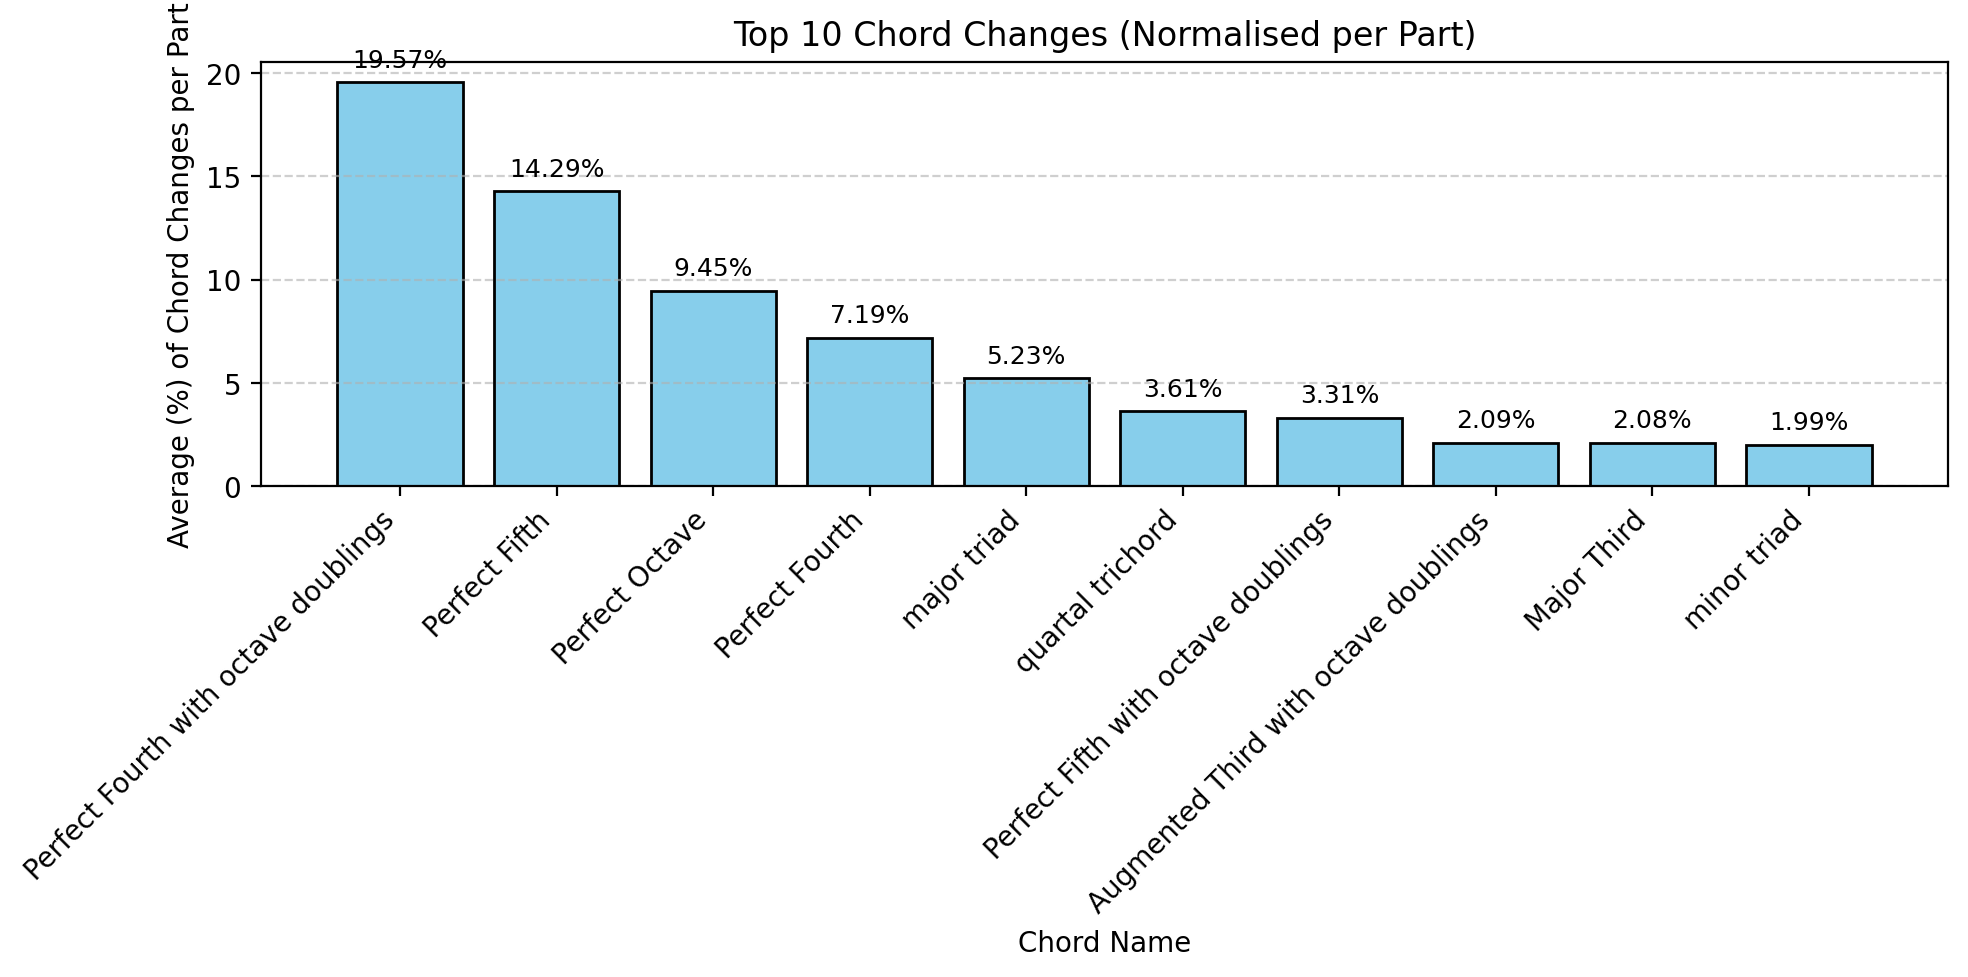

In [125]:
# plot_top_n_chord_changes(get_chord_changes(tuning_parts_dict["Drop D"], normalise=False), n=10, normalise=False)

plot_top_n_chord_changes(get_chord_changes(tuning_parts_dict["Drop D"]))

/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


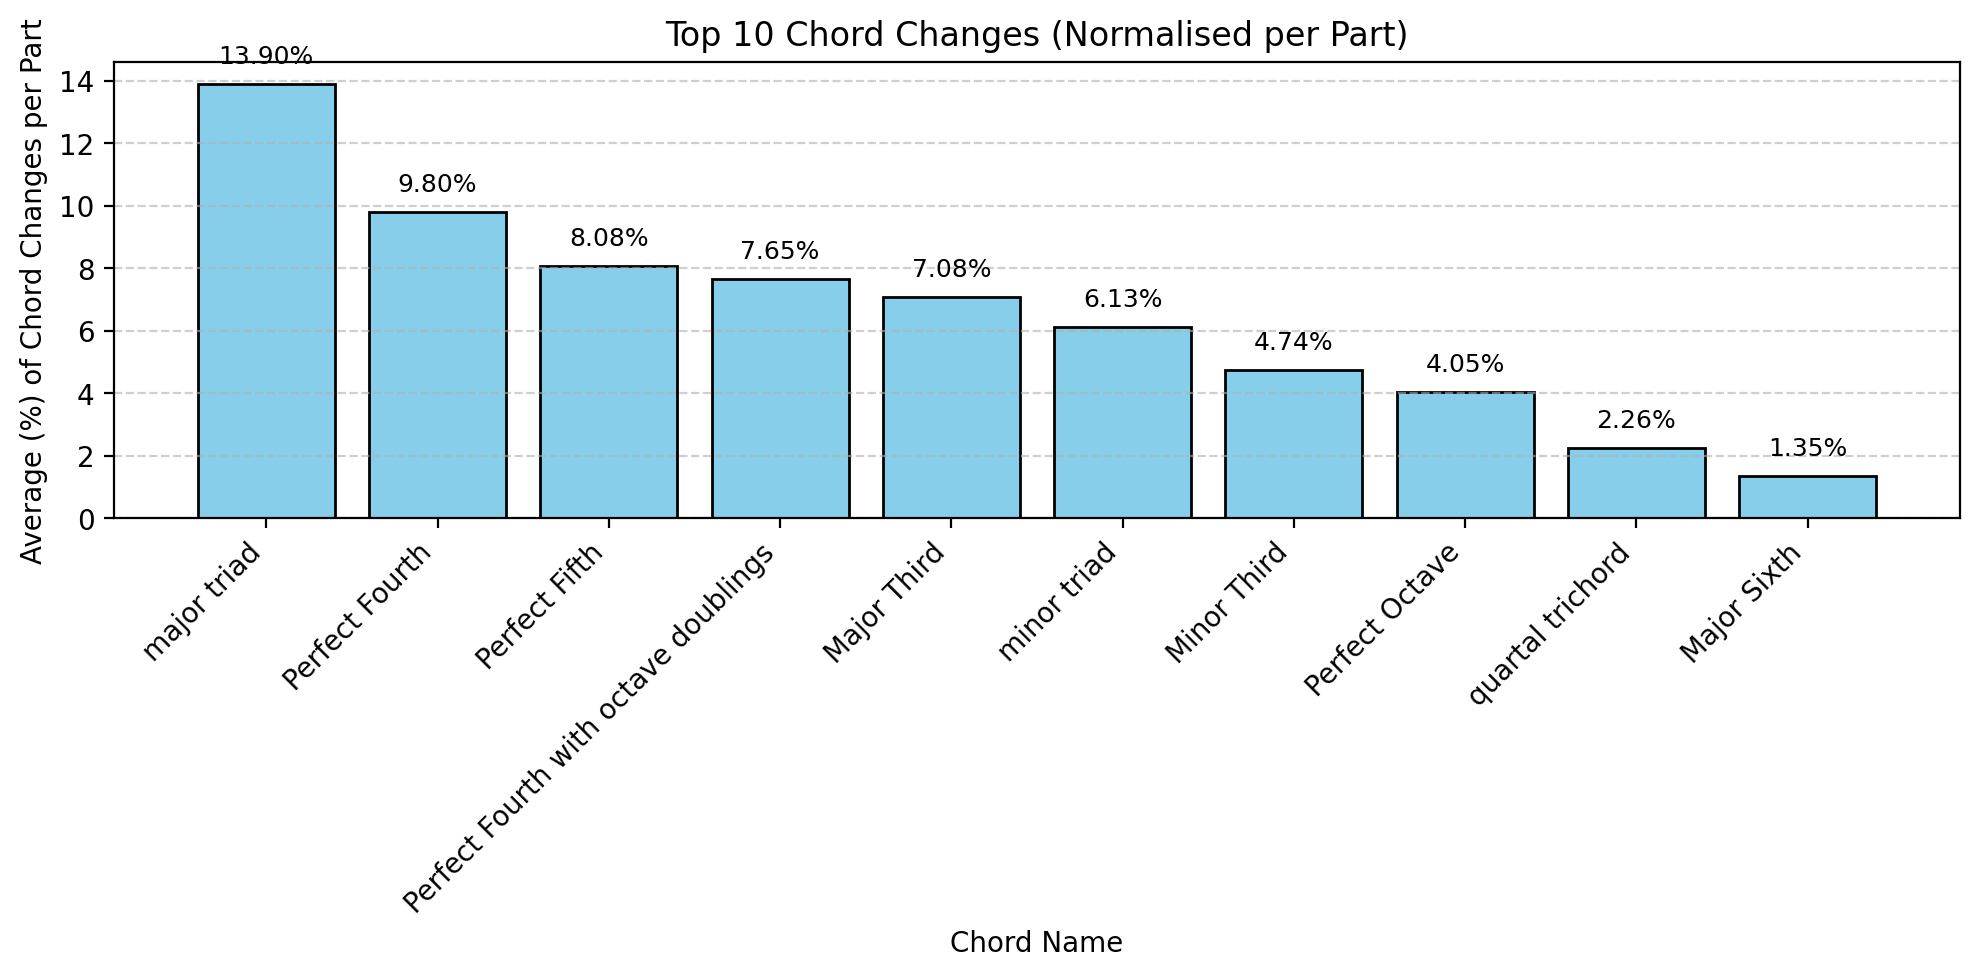

In [121]:
plot_top_n_chord_changes(get_chord_changes(tuning_parts_dict["Standard"]))


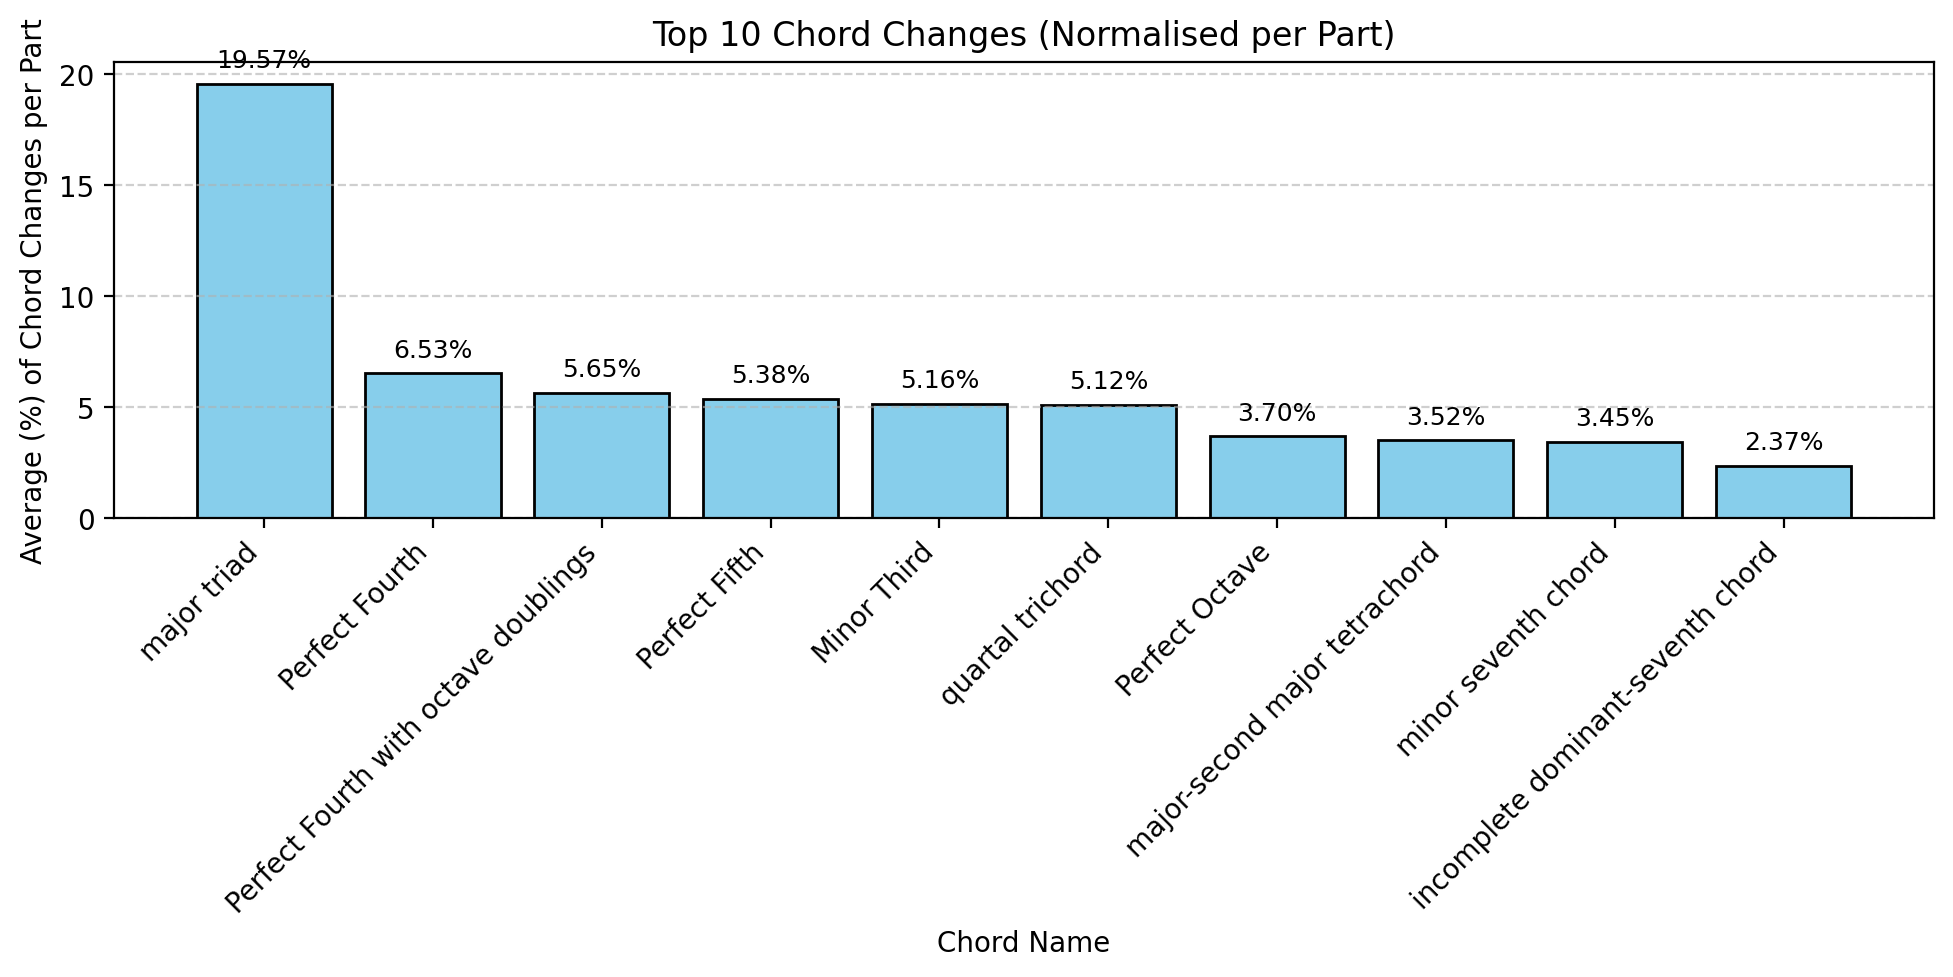

In [123]:
plot_top_n_chord_changes(get_chord_changes(tuning_parts_dict["Open D"]))

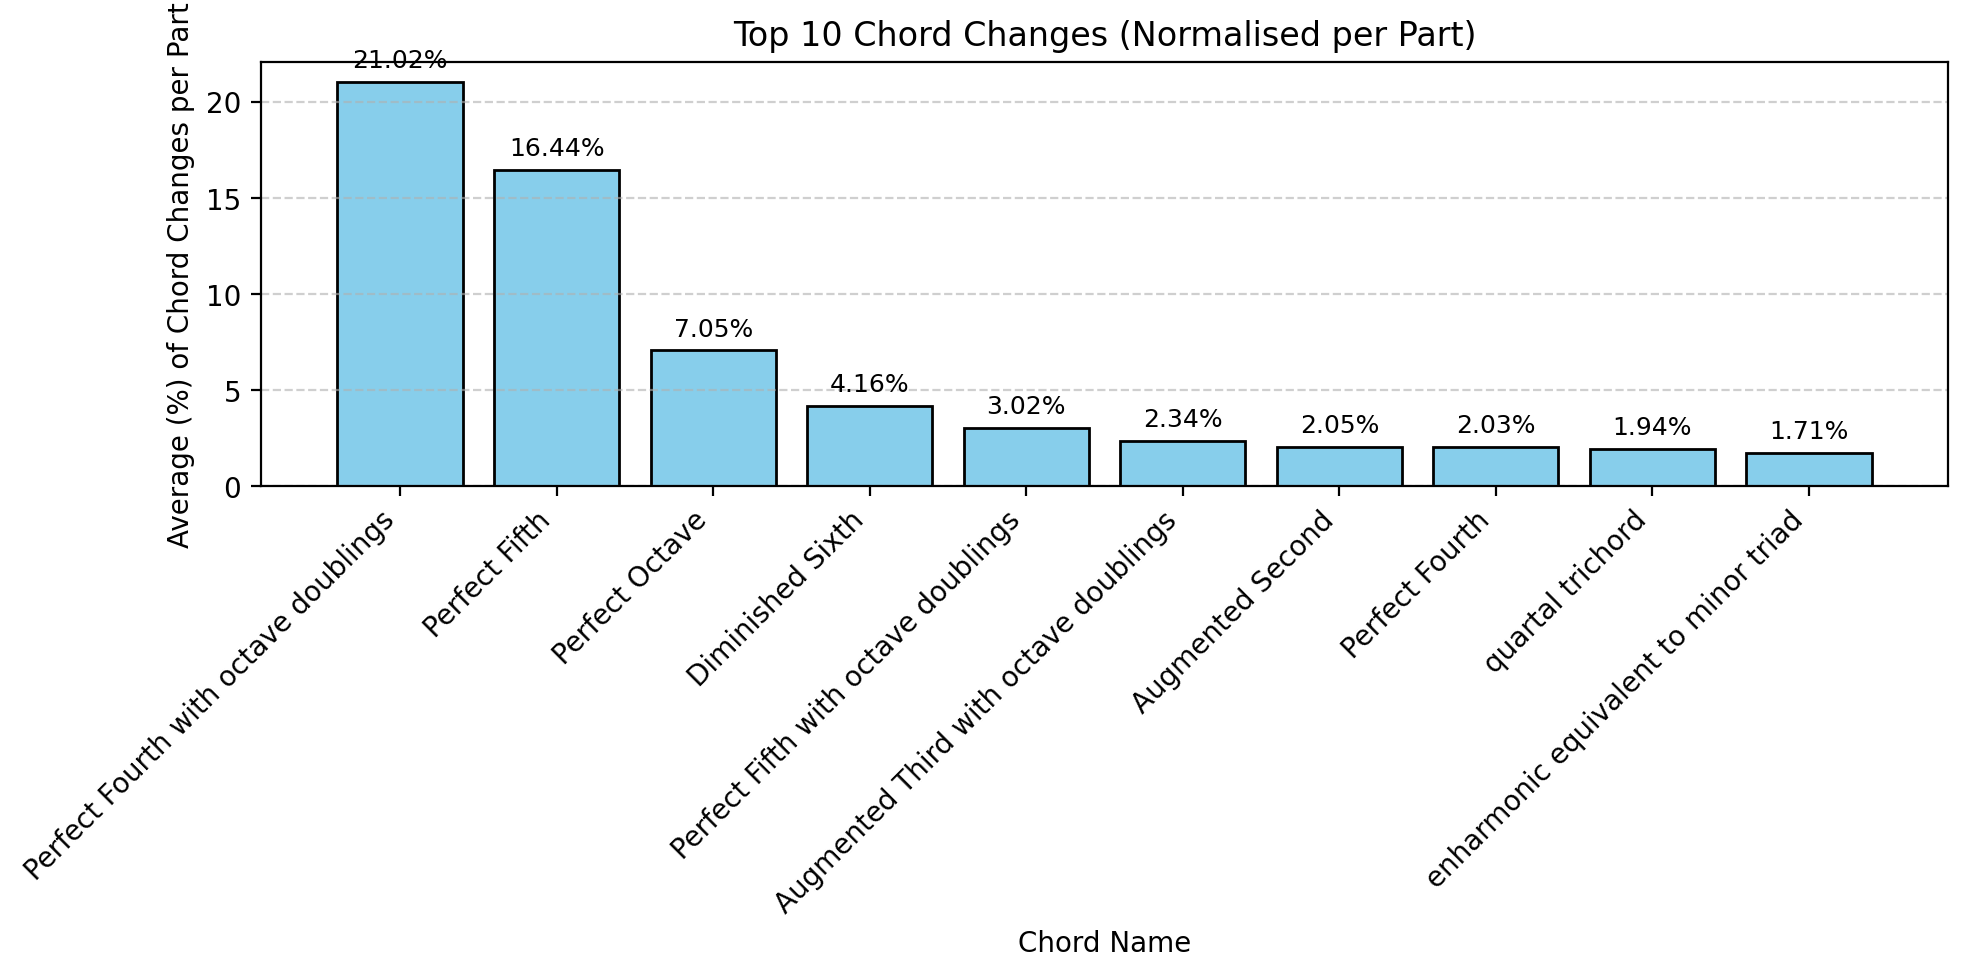

In [124]:
plot_top_n_chord_changes(get_chord_changes(tuning_parts_dict["Drop C"]))


In [ ]:
import pandas as pd

# Get top n chord changes sorted by count
topn = sorted(get_chord_changes(tuning_parts_dict["Drop C"]).items(), key=lambda x: x[1], reverse=True)[:10]

# Create and display a table using pandas
df = pd.DataFrame(topn, columns=["Chord Name", "Count"])
print(df.to_string(index=False))

/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


                           Chord Name  Count
 Perfect Fourth with octave doublings   1686
                        Perfect Fifth    866
                       Perfect Octave    329
Augmented Third with octave doublings    185
                       Perfect Fourth    140
                     quartal trichord    122
                          minor triad    120
                     Diminished Sixth    102
 enharmonic equivalent to minor triad     85
  Perfect Fifth with octave doublings     69


# Horizontal bar comparison plot


In [126]:
import numpy as np

def plot_horizontal_bar_comparison(tuning_chord_dict, topn=5):
    """
    Shows horizontal grouped bar chart comparing top N chord changes across tunings.
    """
    # Find top N global chords across all tunings
    all_chords = {}
    for chord_changes in tuning_chord_dict.values():
        for chord, value in chord_changes.items():
            all_chords[chord] = all_chords.get(chord, 0) + value
    top_chords = sorted(all_chords.items(), key=lambda x: x[1], reverse=True)[:topn]
    selected_chords = [chord for chord, _ in top_chords]

    tunings = list(tuning_chord_dict.keys())
    n_tunings = len(tunings)
    indices = np.arange(topn)
    bar_width = 0.8 / n_tunings

    plt.figure(figsize=(10, 6))

    for i, tuning in enumerate(tunings):
        chord_changes = tuning_chord_dict[tuning]
        values = [chord_changes.get(chord, 0) for chord in selected_chords]
        plt.barh(indices + i * bar_width, values, height=bar_width, label=tuning)

    plt.yticks(indices + bar_width * (n_tunings - 1) / 2, selected_chords)
    plt.xlabel('Average Percentage of Chord Changes per Part (%)')
    plt.title('Chord Usage Comparison Across Tunings')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


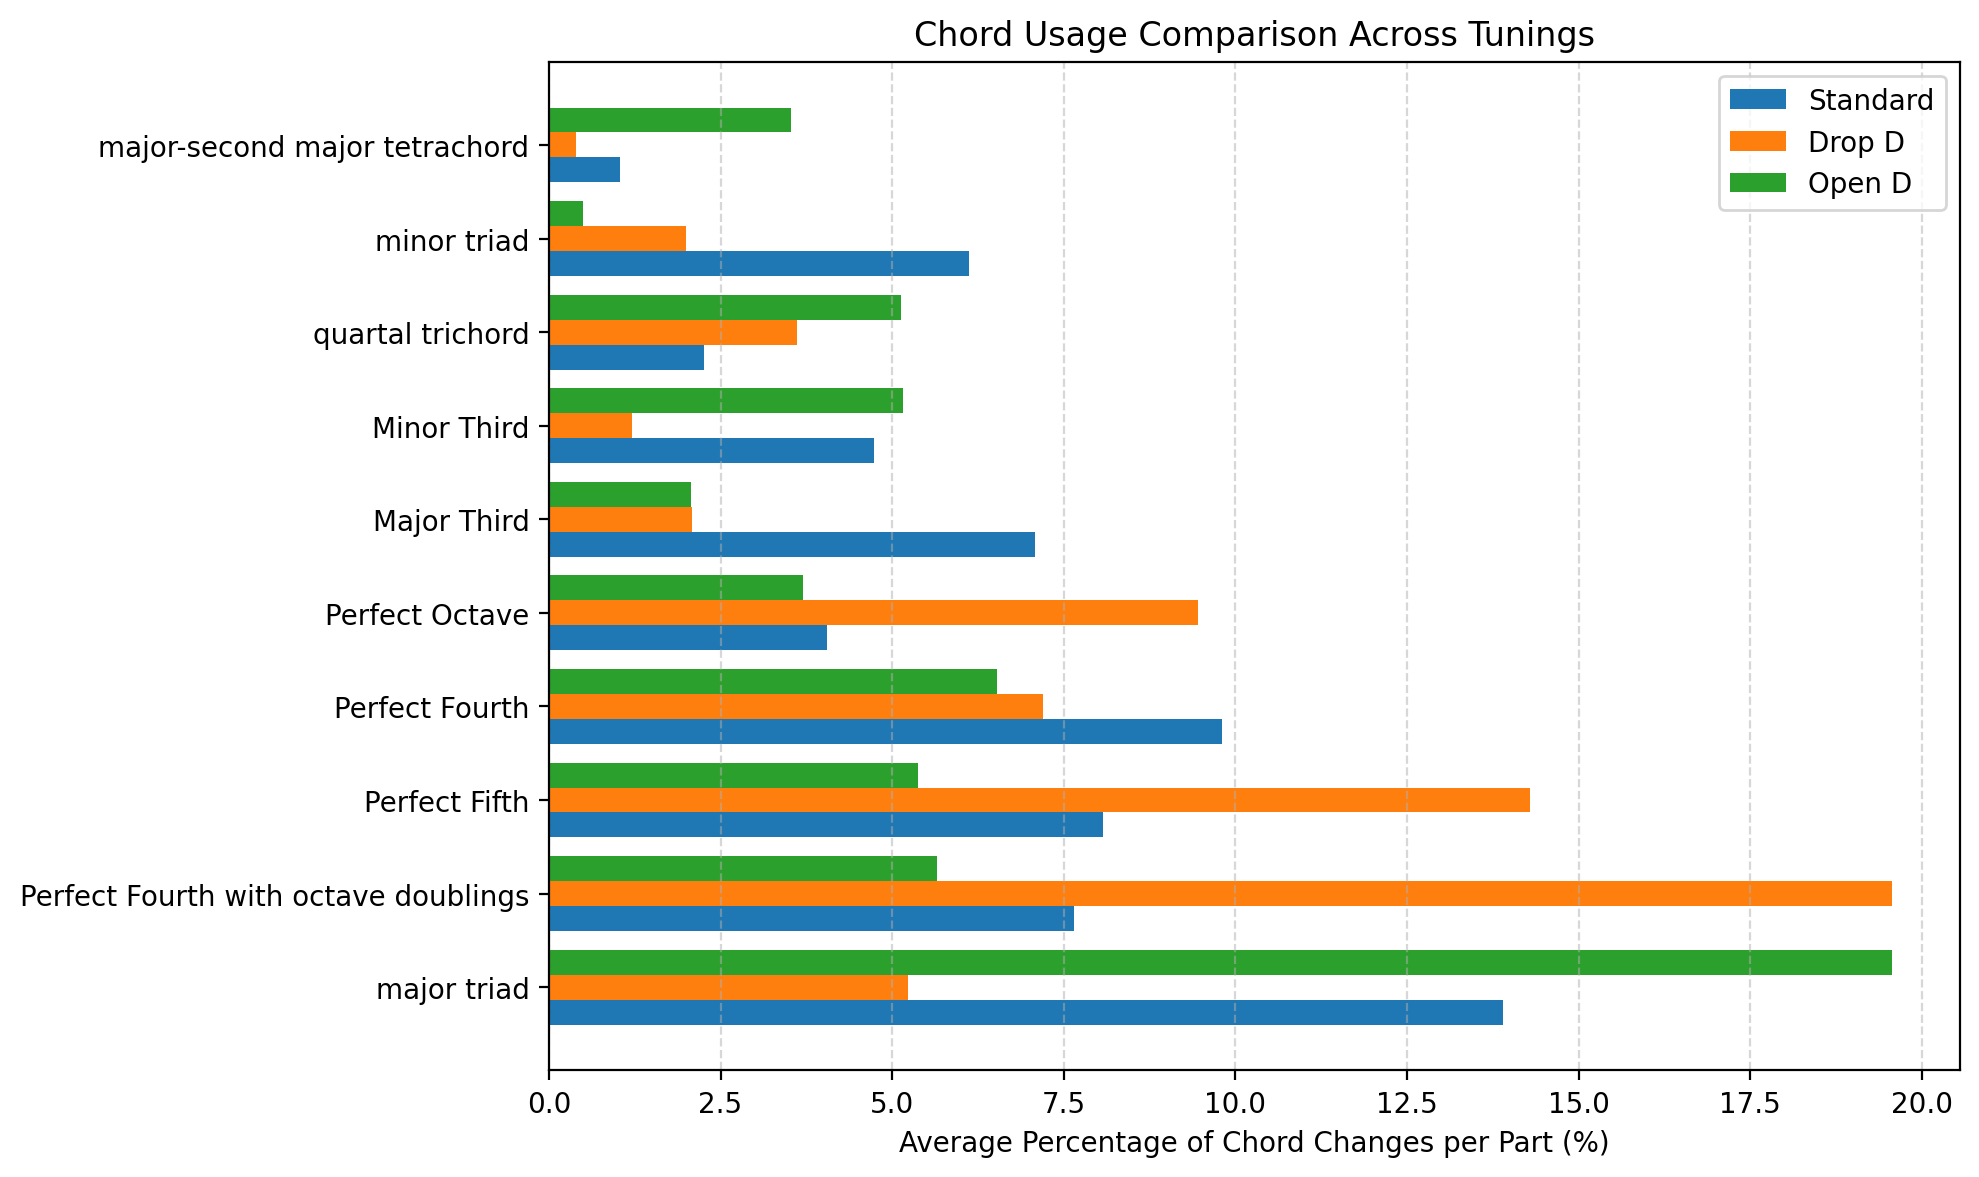

In [128]:
tuning_chord_dict = {
    "Standard": get_chord_changes(tuning_parts_dict["Standard"]),
    "Drop D": get_chord_changes(tuning_parts_dict["Drop D"]),
    "Open D": get_chord_changes(tuning_parts_dict["Open D"]),
    # "Drop C": get_chord_changes(tuning_parts_dict["Drop C"]),
}
plot_horizontal_bar_comparison(tuning_chord_dict, topn=10)

# Chord changes

In [141]:

# def get_root_chord_changes(parts_with_target_guitar, normalise=True):
#     """
#     Get chord changes by root note.
#     """
#     chord_changes = defaultdict(float)

#     for part in parts_with_target_guitar:

#         chords = part.chordify()

#         for element in chords.flat.notes:
#             if isinstance(element, music21.chord.Chord):
#                 root = element.root()
#                 name = root.nameWithOctave
#                 chord_changes[name] += 1

#     return chord_changes

def get_root_chord_changes(parts_with_target_guitar, normalise=True, strip_octave=True):
    """
    Get root note changes across a list of parts. Normalises by number of changes per part if desired.
    """
    chord_changes = defaultdict(float)

    for part in parts_with_target_guitar:
        chords = part.chordify()
        last_root = None
        part_changes = defaultdict(float)

        for element in chords.flat.notes:
            if isinstance(element, music21.chord.Chord):
                root = element.root()
                name = root.name if strip_octave else root.nameWithOctave

                if name != last_root:
                    part_changes[name] += 1
                    last_root = name

        # Normalize for this part
        if normalise:
            total = sum(part_changes.values())
            for key in part_changes:
                part_changes[key] = (part_changes[key] / total) * 100 if total > 0 else 0

        # Add to overall counts
        for key in part_changes:
            chord_changes[key] += part_changes[key]

    if normalise:
        # Average across number of parts
        num_parts = len(parts_with_target_guitar)
        for key in chord_changes:
            chord_changes[key] /= num_parts

    return dict(chord_changes)

def plot_root_chord_changes(root_chord_dict, tuning_name="Tuning", topn=10, normalise=True):
    """
    Plot horizontal bar chart of root note chord change percentages.
    """
    sorted_roots = sorted(root_chord_dict.items(), key=lambda x: x[1], reverse=True)[:topn]
    labels = [item[0] for item in sorted_roots]
    values = [item[1] for item in sorted_roots]

    plt.figure(figsize=(8, 5))
    bars = plt.barh(range(len(values)), values, color='mediumseagreen', edgecolor='black')
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Average Percentage of Root Changes per Part (%)' if normalise else 'Root Change Count')
    plt.title(f'Top {topn} Root Note Changes ({tuning_name})')
    plt.gca().invert_yaxis()  # most common on top
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    # Annotate bars
    for i, bar in enumerate(bars):
        value = values[i]
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
                 f'{value:.2f}' if normalise else str(int(value)),
                 va='center', fontsize=9)

    plt.tight_layout()
    plt.show()



import matplotlib.pyplot as plt

def plot_root_changes_comparison_single_figure(tuning_to_root_changes_dict, topn=10, normalise=True):
    """
    Plot a single figure with grouped horizontal bar charts comparing root note chord changes across tunings.

    Parameters:
    - tuning_to_root_changes_dict: dict of {tuning_name: root_change_dict}
    - topn: number of top roots to display (based on overall popularity across all tunings)
    - normalise: whether values represent percentages
    """
    # Collect all root notes and their summed values across all tunings for global top-n selection
    total_counts = defaultdict(float)
    for root_dict in tuning_to_root_changes_dict.values():
        for root, value in root_dict.items():
            total_counts[root] += value

    # Select top N most common roots overall
    top_roots = [root for root, _ in sorted(total_counts.items(), key=lambda x: x[1], reverse=True)[:topn]]

    tuning_names = list(tuning_to_root_changes_dict.keys())
    num_tunings = len(tuning_names)
    bar_width = 0.8 / num_tunings  # Adjust bar width for grouped bars

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (tuning, root_dict) in enumerate(tuning_to_root_changes_dict.items()):
        values = [root_dict.get(root, 0) for root in top_roots]
        positions = [j + i * bar_width for j in range(len(top_roots))]
        bars = ax.barh(positions, values, height=bar_width, label=tuning, edgecolor='black')

        # Annotate bars
        for j, bar in enumerate(bars):
            val = values[j]
            ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
                    f'{val:.2f}' if normalise else str(int(val)),
                    va='center', fontsize=8)

    # Set y-axis labels and ticks
    ax.set_yticks([j + (num_tunings - 1) * bar_width / 2 for j in range(len(top_roots))])
    ax.set_yticklabels(top_roots)
    ax.set_xlabel('%' if normalise else 'Count')
    ax.set_title('Root Note Chord Changes Comparison by Tuning')
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.legend()

    plt.tight_layout()
    plt.show()


In [132]:
test = get_root_chord_changes(tuning_parts_dict["Drop C"])

/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [135]:
print(len(test))

50


/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


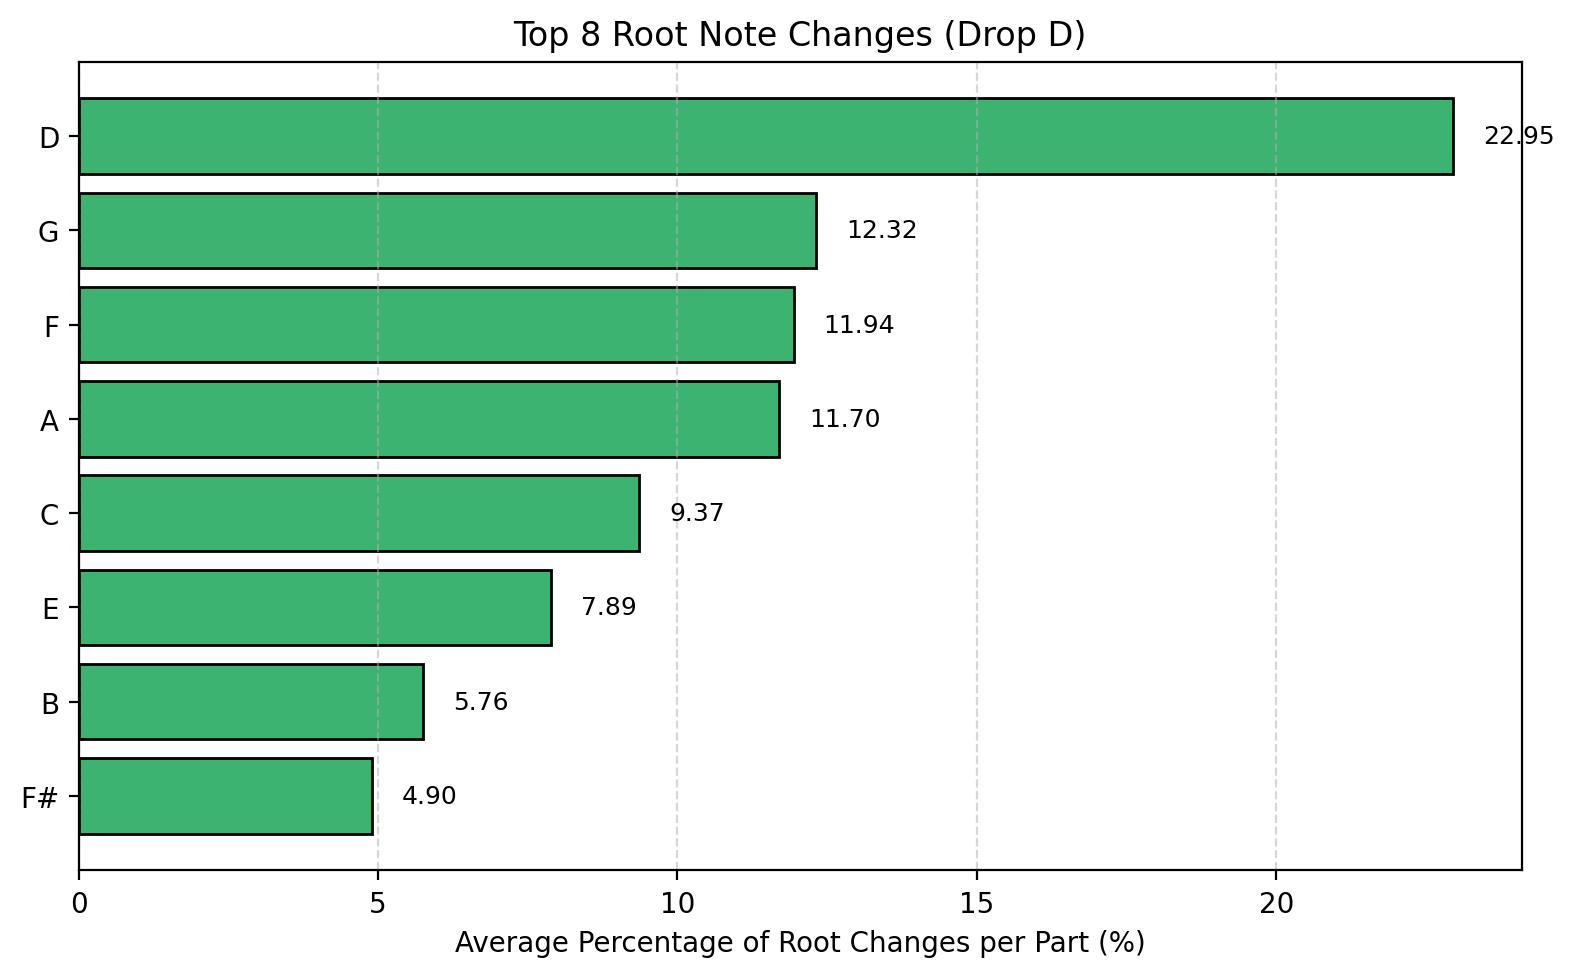

In [138]:
root_changes_dropd = get_root_chord_changes(tuning_parts_dict["Drop D"])
plot_root_chord_changes(root_changes_dropd, tuning_name="Drop D", topn=8)


/home/am/Documents/upf_smc/yr1/amplab/ug-dataset/.venv/lib/python3.11/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


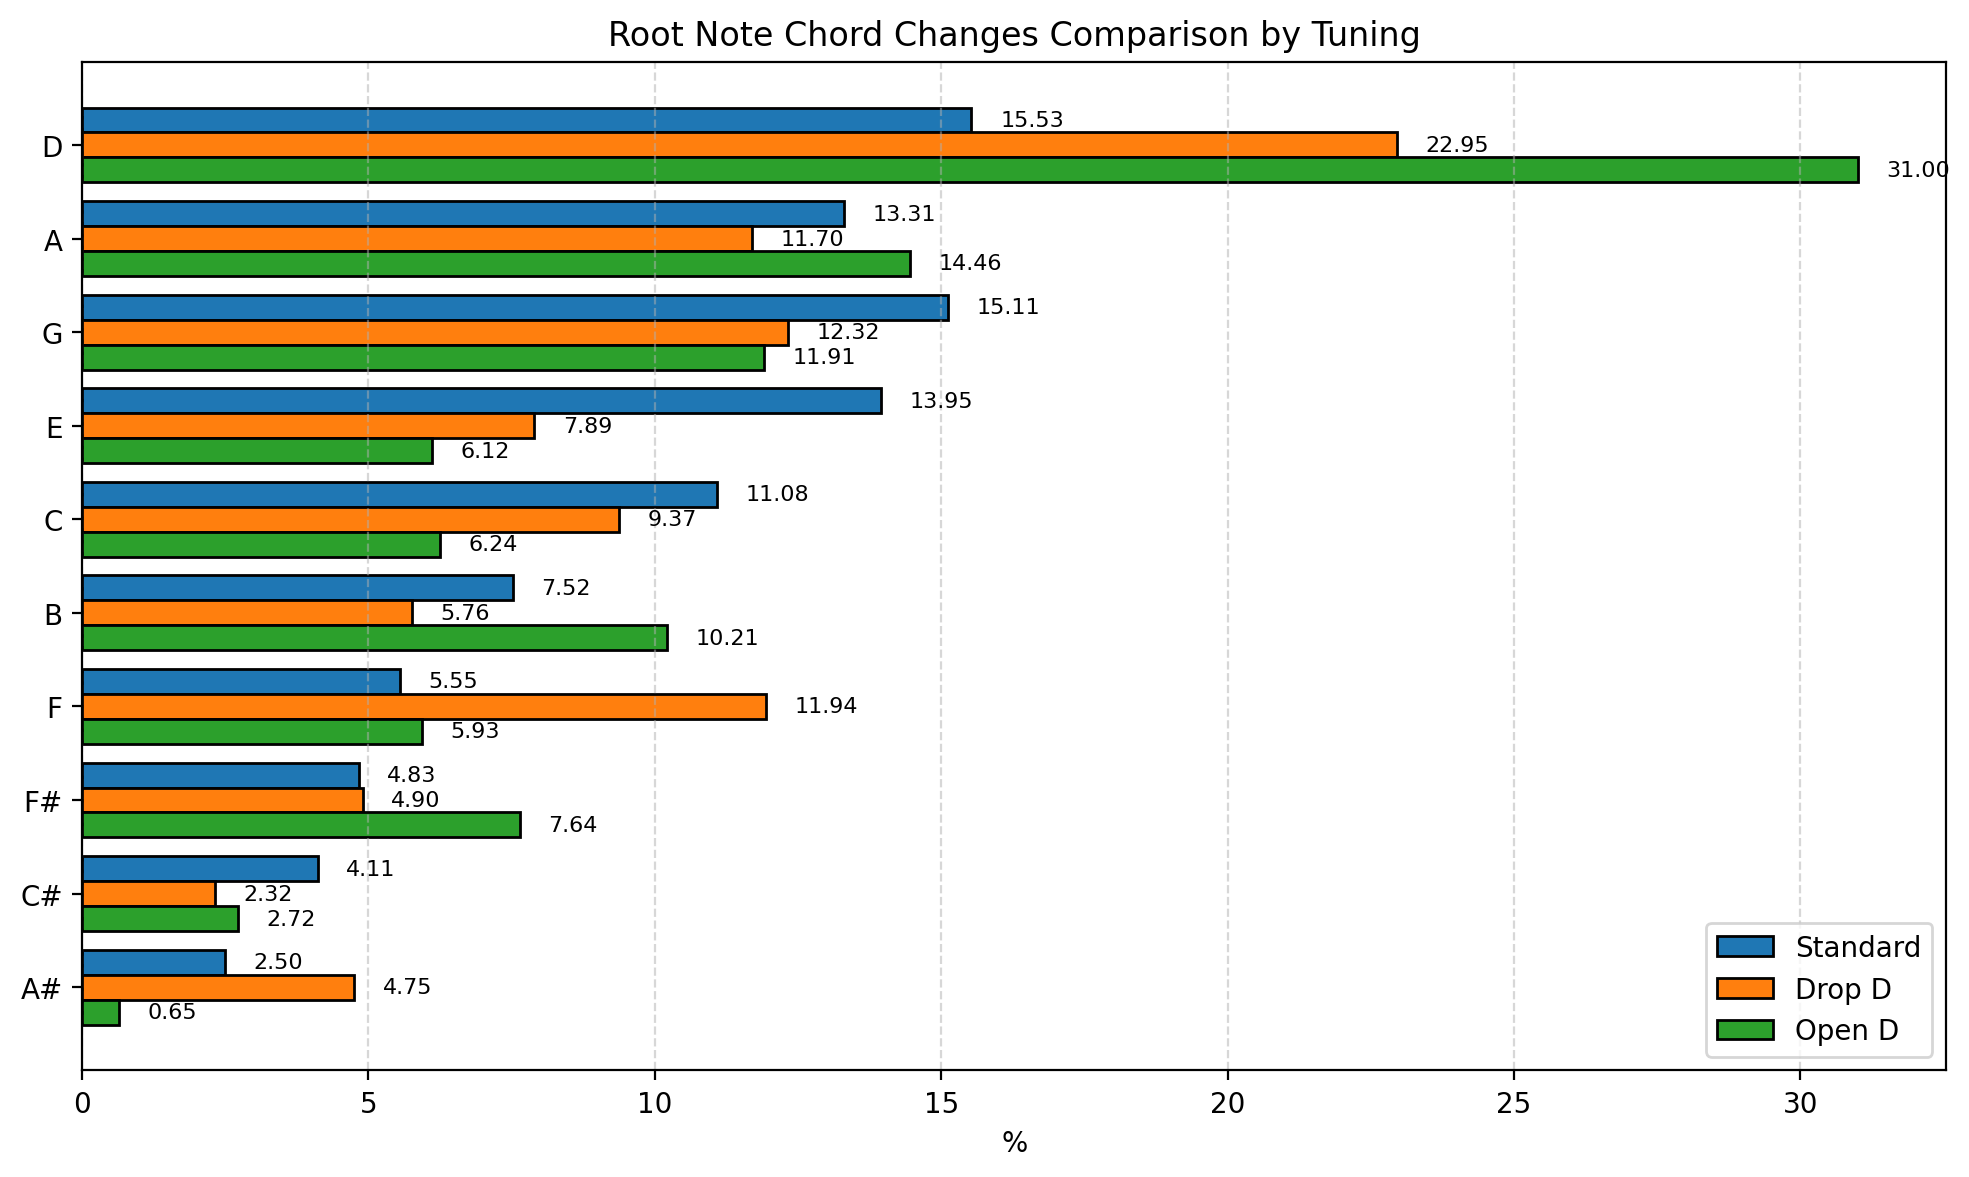

In [142]:
root_changes_dict = {
    "Standard": get_root_chord_changes(tuning_parts_dict["Standard"]),
    "Drop D": get_root_chord_changes(tuning_parts_dict["Drop D"]),
    "Open D": get_root_chord_changes(tuning_parts_dict["Open D"])
}

plot_root_changes_comparison_single_figure(root_changes_dict, topn=10)